In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# from google.colab import files
# uploaded_file=files.upload_file("Uber_data")

Saved Uber_data.xlsx to /content/Uber_data


In [25]:
df = pd.read_excel("/content/Uber_data")

In [26]:
df.head()

,Request id,Pickup point,Drop point,Request timestamp,Start timestamp,Drop timestamp,Trip Cost,Extra Tip,Driver id,Trip Status,Ride Type,Payment Method,Weather
0,4386,Majestic Bus Station,Bangalore Palace,2021-07-13 00:00:24,NaT,NaT,0.00,0,61.0,Trip Cancelled,UberXL,NaN,Clear
1,4387,Lalbagh Botanical Garden,Indiranagar,2021-07-13 00:02:14,2021-07-13 00:16:00,2021-07-13 00:26:14,111.38,0,17.0,Trip Completed,UberGo,Cash,Cloudy
2,4388,Lalbagh Botanical Garden,Kormangala Police Station,2021-07-13 00:06:34,2021-07-13 00:14:01,2021-07-13 02:01:34,89.00,25,21.0,Trip Completed,UberXL,Card,Clear
3,4389,Majestic Bus Station,ISKCON Temple,2021-07-13 00:07:31,NaT,NaT,0.00,0,NaN,No Cars Available,UberXL,NaN,Rainy
4,4390,Bangalore City Railway Station,Lalbagh Botanical Garden,2021-07-13 00:07:58,2021-07-13 00:20:21,2021-07-13 00:40:58,307.40,25,35.0,Trip Completed,UberGo,Cash,Rainy


In [27]:
df.columns

Index(['Request id', 'Pickup point', 'Drop point', 'Request timestamp',
       'Start timestamp', 'Drop timestamp', 'Trip Cost', 'Extra Tip',
       'Driver id', 'Trip Status', 'Ride Type', 'Payment Method', 'Weather'],
      dtype='object')

In [28]:
# standardize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['request_id', 'pickup_point', 'drop_point', 'request_timestamp',
       'start_timestamp', 'drop_timestamp', 'trip_cost', 'extra_tip',
       'driver_id', 'trip_status', 'ride_type', 'payment_method', 'weather'],
      dtype='object')

In [29]:
df.isnull().sum()

,0
request_id,0
pickup_point,0
drop_point,0
request_timestamp,0
start_timestamp,1650
drop_timestamp,1650
trip_cost,0
extra_tip,0
driver_id,775
trip_status,0


In [30]:
# Fill missing driver ID with -1 (indicates unassigned)
df['driver_id']=df['driver_id'].fillna(-1)

In [31]:
# Fill missing payment method with mode
df['payment_method']=df['payment_method'].fillna(df['payment_method'].mode()[0])

In [32]:
# Drop rows where timestamps are missing only for 'Trip Completed'
df = df[~((df['trip_status'] == 'Trip Completed') & (df['start_timestamp'].isna() | df['drop_timestamp'].isna()))]

In [33]:
df.isnull().sum()

,0
request_id,0
pickup_point,0
drop_point,0
request_timestamp,0
start_timestamp,1650
drop_timestamp,1650
trip_cost,0
extra_tip,0
driver_id,0
trip_status,0


In [34]:
# Convert date columns to datetime
date_columns = ['request_timestamp', 'start_timestamp', 'drop_timestamp']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

In [35]:
#  List all numeric columns
numeric_columns = df.select_dtypes(include='number').columns.tolist()
print(numeric_columns)

['request_id', 'trip_cost', 'extra_tip', 'driver_id']


In [36]:
#Outlier detection - Trip Cost

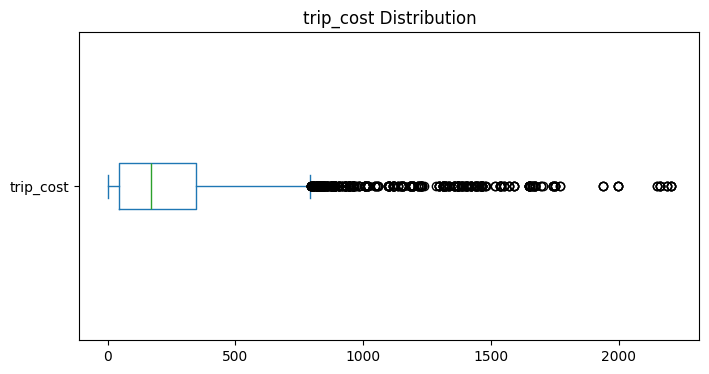

In [37]:
# Plot boxplot for trip cost
plt.figure(figsize=(8, 4))
df['trip_cost'].plot(kind='box', vert=False)
plt.title('trip_cost Distribution')
plt.show()

In [40]:
# Detect and cap outliers in trip cost using IQR
Q1 = df['trip_cost'].quantile(0.25)
Q3 = df['trip_cost'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
df['trip_cost'] = np.where(df['trip_cost'] > upper_bound, upper_bound, df['trip_cost'])

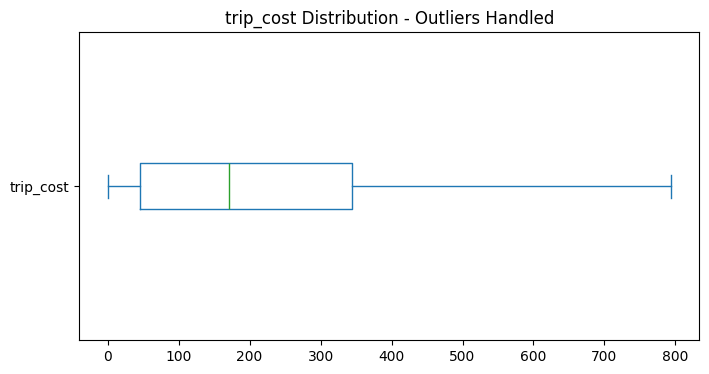

In [41]:
# Plot boxplot for trip cost
plt.figure(figsize=(8, 4))
df['trip_cost'].plot(kind='box', vert=False)
plt.title('trip_cost Distribution - Outliers Handled')
plt.show()

In [42]:
# Outlier Detection - Extra Tip

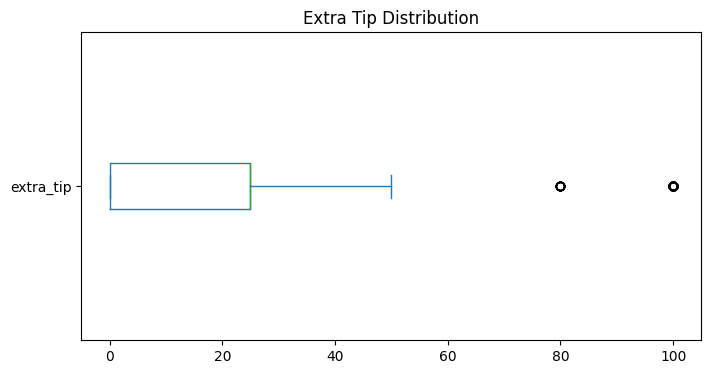

In [43]:
plt.figure(figsize=(8, 4))
df['extra_tip'].plot(kind='box', vert=False)
plt.title('Extra Tip Distribution')
plt.show()

In [44]:
df.shape

(6745, 13)

In [45]:
df.dtypes

,0
request_id,int64
pickup_point,object
drop_point,object
request_timestamp,datetime64[ns]
start_timestamp,datetime64[ns]
drop_timestamp,datetime64[ns]
trip_cost,float64
extra_tip,int64
driver_id,float64
trip_status,object


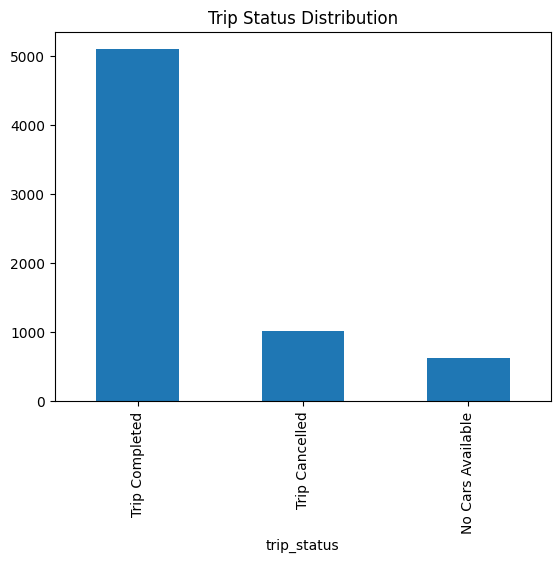

In [46]:
# Plot the value_counts for different trip statuses
df['trip_status'].value_counts().plot(kind='bar')
plt.title("Trip Status Distribution")
plt.show()

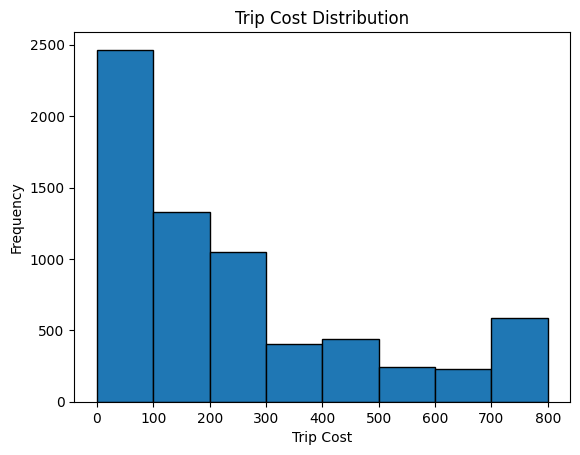

In [48]:
# Trip Cost Distribution
max_cost = df['trip_cost'].max()
bins = np.arange(0, max_cost + 100, 100)

df['trip_cost'].hist(bins=bins, edgecolor='black')
plt.title("Trip Cost Distribution")
plt.xlabel("Trip Cost")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

In [49]:
# Analyze trip costs across payment methods by calculating the average, median, and number of trips for each method,
# and sort the results to highlight the most expensive payment types on average

df.groupby('payment_method')['trip_cost'].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)

,mean,median,count
payment_method,,,
Card,316.517799,231.50,1708
UPI,315.056717,233.75,1663
Cash,156.880047,45.00,3374


In [50]:
# Compute the trip duration in minutes by taking the difference between drop and start timestamps
df['trip_duration_minutes'] = (df['drop_timestamp'] - df['start_timestamp']).dt.total_seconds() / 60

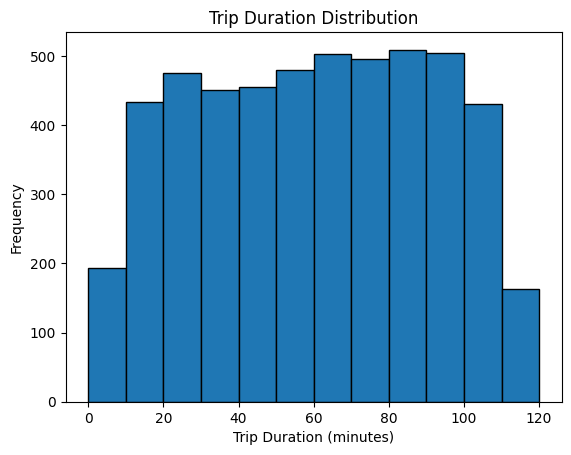

In [51]:
# Trip Duration
max_duration = df['trip_duration_minutes'].max()
bins = np.arange(0, max_duration + 10, 10)  # bins of size 10 minutes

df['trip_duration_minutes'].hist(bins=bins, edgecolor='black')
plt.title("Trip Duration Distribution")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

In [52]:
# Calculate Total cost of the trip
df['total_cost'] = df['trip_cost'] + df['extra_tip']

In [53]:
# Convert Time Columns to DateTime Format

df['request_timestamp'] = pd.to_datetime(df['request_timestamp'])
df['start_timestamp'] = pd.to_datetime(df['start_timestamp'])
df['drop_timestamp'] = pd.to_datetime(df['drop_timestamp'])

In [54]:
# Extract Date and Time Components
'''
From the relevant datetime column(s), extract:
1. Date (YYYY-MM-DD) (request_date, start_date, drop_date)
2. Day of the week (e.g., Monday, Tuesday) (request_day, start_day, drop_day)
3. Exact time (HH:MM:SS) (request_time, start_time, drop_time)
4. Hour of the day (0–23) (request_hour, start_hour, drop_hour)
'''

df['request_date'] = df['request_timestamp'].dt.date
df['start_date'] = df['start_timestamp'].dt.date
df['drop_date'] = df['drop_timestamp'].dt.date

df['request_day'] = df['request_timestamp'].dt.day_name()
df['start_day'] = df['start_timestamp'].dt.day_name()
df['drop_day'] = df['drop_timestamp'].dt.day_name()

df['request_time'] = df['request_timestamp'].dt.time
df['start_time'] = df['start_timestamp'].dt.time
df['drop_time'] = df['drop_timestamp'].dt.time

df['request_hour'] = df['request_timestamp'].dt.hour
df['start_hour'] = df['start_timestamp'].dt.hour
df['drop_hour'] = df['drop_timestamp'].dt.hour

In [55]:
# Calculating the Ride delay.
'''
- Determine the delay between the ride request and actual trip start.
- Add a column ride_delay reflecting this delay in hour value.
'''
df["ride_delay"] = ((df["drop_timestamp"] - df["start_timestamp"]).dt.total_seconds() / 3600).round(2)

In [56]:
# Determine Cancellation reasons
# - Assign a cancellation reason to each trip based on the driver_id and trip_status columns using nested np.where() statements.
'''
1. If the driver_id is -1 and the trip status is 'No Cars Available', it indicates that no cab was assigned,
so the cancellation reason is set to 'No Cabs'.
2. If the driver_id is -1 and the trip status is 'Trip Cancelled', it means the passenger canceled the trip before a driver was assigned,
so the reason is 'Passenger'.
3. If a driver was assigned (driver_id not equal to -1) and the trip status is 'Trip Cancelled', it indicates that the driver canceled the trip,
so the reason is 'Driver'.
4. For all other cases—where the trip was completed successfully—the cancellation reason is set to 'Trip Completed'.

'''

df['cancellation_reason'] = np.where(
    (df['driver_id'] == -1) & (df['trip_status'] == 'No Cars Available'), 'No Cabs',
    np.where(
        (df['driver_id'] == -1) & (df['trip_status'] == 'Trip Cancelled'), 'Passenger',
        np.where(
            (df['driver_id'] != -1) & (df['trip_status'] == 'Trip Cancelled'), 'Driver',
            'Trip Completed'
        )
    )
)

In [57]:
# Creating a New Dataframe selecting columns relevant to our analysis
# All analysis going forward will be done on this new dataframe created

new_df = df[['request_id', 'driver_id', 'trip_status', 'request_day', 'request_hour','start_day', 'start_hour', 'drop_day', 'drop_hour', 'trip_cost',
            'ride_delay', 'weather', 'cancellation_reason']]

new_df.columns

Index(['request_id', 'driver_id', 'trip_status', 'request_day', 'request_hour',
       'start_day', 'start_hour', 'drop_day', 'drop_hour', 'trip_cost',
       'ride_delay', 'weather', 'cancellation_reason'],
      dtype='object')

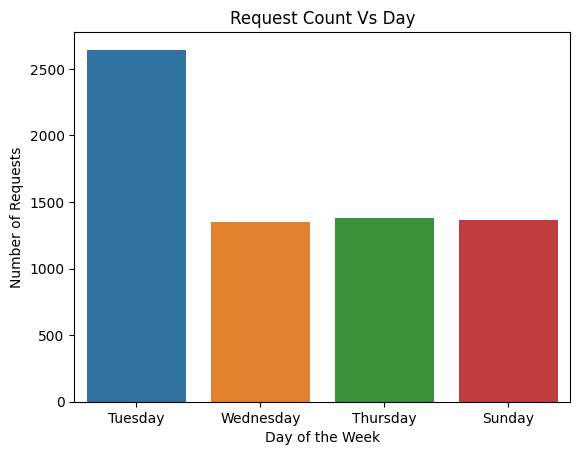

In [60]:
# bar chart / Count plot (using Seaborn) that shows the number of ride requests for each day of the week (request_day column)
sns.countplot(
    new_df,
    x='request_day',
    hue='request_day',
    legend=False
)

plt.title("Request Count Vs Day")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Requests")
plt.show()

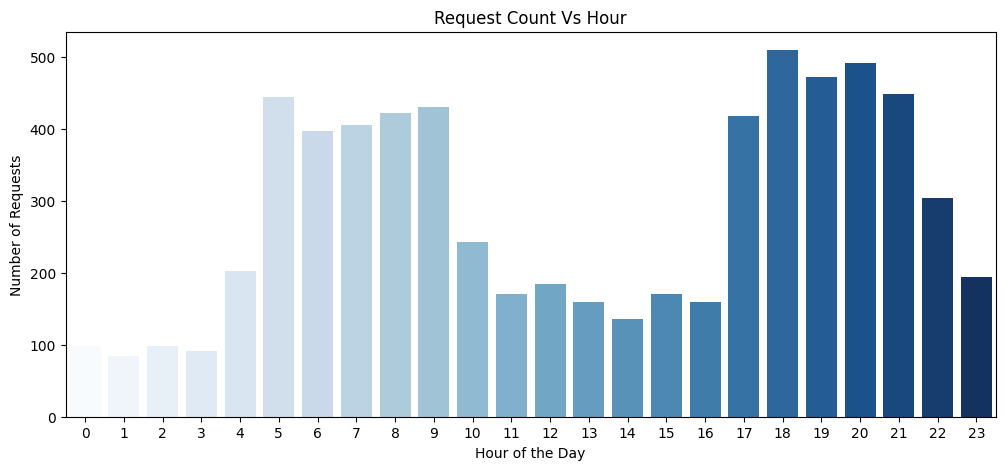

In [59]:
# bar chart / Count plot (using Seaborn) that shows the number of ride requests for each day of the week (request_day column)
plt.figure(figsize = (12, 5))

sns.countplot(
    new_df,
    x='request_hour',
    hue='request_hour',
    palette='Blues',
    legend=False
)

plt.title("Request Count Vs Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Requests")
plt.show()

trip_status
Trip Completed       75.537435
Trip Cancelled       15.151964
No Cars Available     9.310600
Name: proportion, dtype: float64


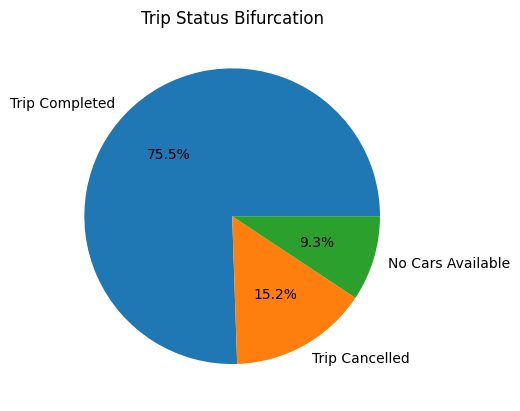

In [63]:
#  trip status bifurcation (normalize to percentage)
trip_status_rates = new_df['trip_status'].value_counts(normalize=True) * 100
print(trip_status_rates)

plt.pie(trip_status_rates , labels = trip_status_rates.index, autopct = '%1.1f%%')

plt.title("Trip Status Bifurcation")
plt.show()

Cancellation Trends (Driver vs Passenger):
cancellation_reason
Driver       875
Passenger    147
Name: count, dtype: int64


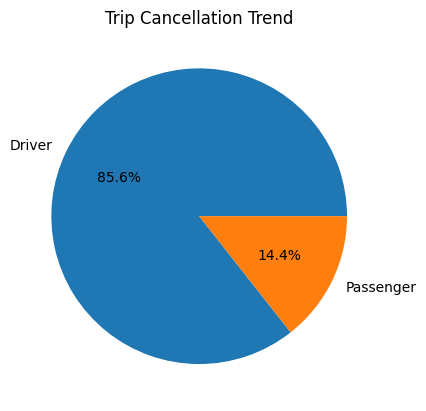

In [64]:
# cancellation trends based on the 'cancellation_reason' column & plot the same
cancellation_trends = new_df[new_df['trip_status'] == 'Trip Cancelled']['cancellation_reason'].value_counts()

print(f"Cancellation Trends (Driver vs Passenger):")
print(cancellation_trends)
plt.pie(cancellation_trends , labels = cancellation_trends.index, autopct = '%1.1f%%')
plt.title("Trip Cancellation Trend")
plt.show()

In [65]:
#reating a New Dataframe for only incomplete rides.

new_df = df[df['trip_status'] != 'Trip Completed']

new_df = new_df[[
    'request_id',
    'pickup_point',
    'drop_point',
    'driver_id',
    'trip_status',
    'payment_method',
    'weather',
    'request_day',
    'request_hour',
    'cancellation_reason'
]]

new_df.head()

,request_id,pickup_point,drop_point,driver_id,trip_status,payment_method,weather,request_day,request_hour,cancellation_reason
0,4386,Majestic Bus Station,Bangalore Palace,61.0,Trip Cancelled,Cash,Clear,Tuesday,0,Driver
3,4389,Majestic Bus Station,ISKCON Temple,-1.0,No Cars Available,Cash,Rainy,Tuesday,0,No Cabs
9,4395,UB City,Lalbagh Botanical Garden,2.0,Trip Cancelled,Cash,Clear,Tuesday,0,Driver
14,4400,KR Puram Railway Station,Embassy Tech Village,69.0,Trip Cancelled,Cash,Clear,Tuesday,0,Driver
17,4403,BTM Layout,Orion Mall,94.0,Trip Cancelled,Cash,Cloudy,Tuesday,0,Driver


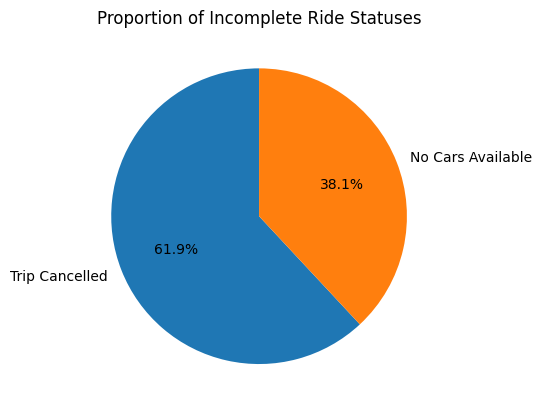

In [66]:
# Proportion of Incomplete Rides’ Trip Statuses
Incomplete_rides_rate=new_df['trip_status'].value_counts(normalize=True)
plt.pie(Incomplete_rides_rate,labels=Incomplete_rides_rate.index,autopct='%1.1f%%',startangle=90)
plt.title('Proportion of Incomplete Ride Statuses')
plt.show()


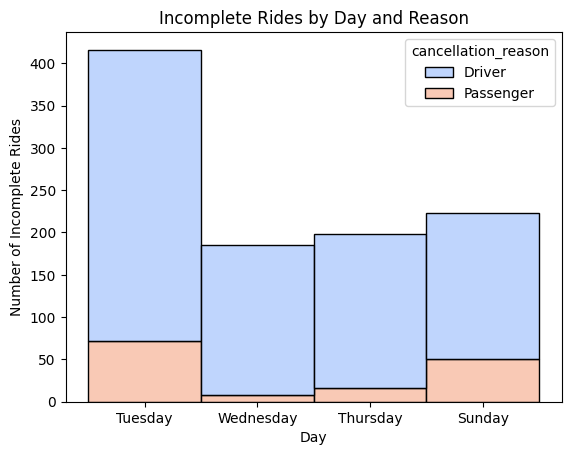

In [67]:
'''Which is the day with the most rides cancelled?
What is the split of cancelled trips' status across days? '''

cancelled_rides = df[df['trip_status'] == 'Trip Cancelled']
sns.histplot(data=cancelled_rides, x='request_day',bins=7, hue='cancellation_reason', multiple='stack', palette='coolwarm')

plt.title('Incomplete Rides by Day and Reason')
plt.xlabel('Day')
plt.ylabel('Number of Incomplete Rides')
plt.show()


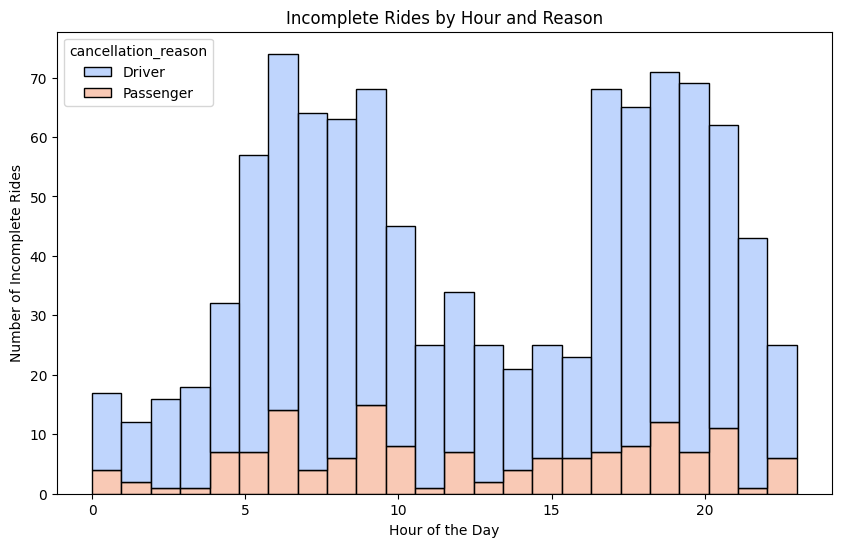

In [68]:
''' What are the times of the days with most rides cancelled?
What are the reasons for the cancellations throughout the day? '''
cancelled_rides = df[df['trip_status'] == 'Trip Cancelled']

plt.figure(figsize=(10, 6))

sns.histplot(data=cancelled_rides, x='request_hour',bins=24, hue='cancellation_reason', multiple='stack', palette='coolwarm')

plt.title('Incomplete Rides by Hour and Reason')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incomplete Rides')
plt.show()



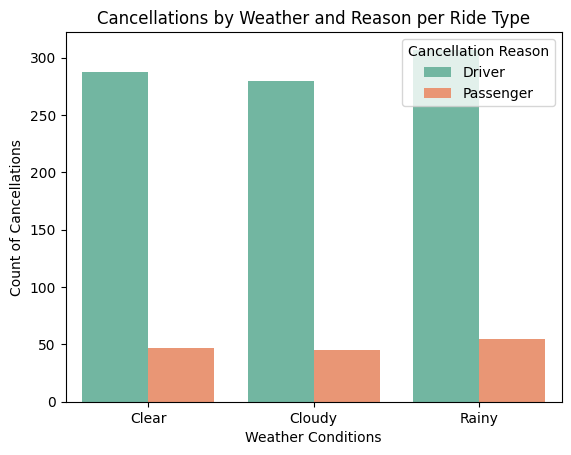

In [69]:
# Relationship Between Weather & Cancellation Reason
cancelled_trips = df[df['trip_status'] == 'Trip Cancelled']

grouped = cancelled_trips.groupby(['weather', 'cancellation_reason']).size().reset_index(name='count')

sns.barplot(data=grouped, x='weather', y='count', hue='cancellation_reason',palette='Set2')

plt.title('Cancellations by Weather and Reason per Ride Type')
plt.xlabel('Weather Conditions')
plt.ylabel('Count of Cancellations')
plt.legend(title='Cancellation Reason')
plt.show()

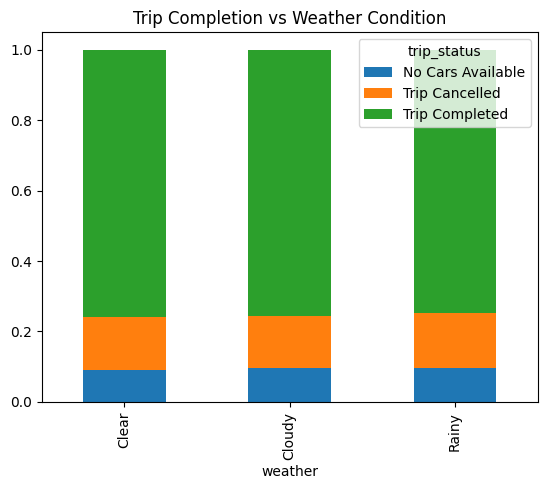

In [81]:
# Weather Impact on Trips
df.groupby('weather')['trip_status'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title("Trip Completion vs Weather Condition")
plt.show()


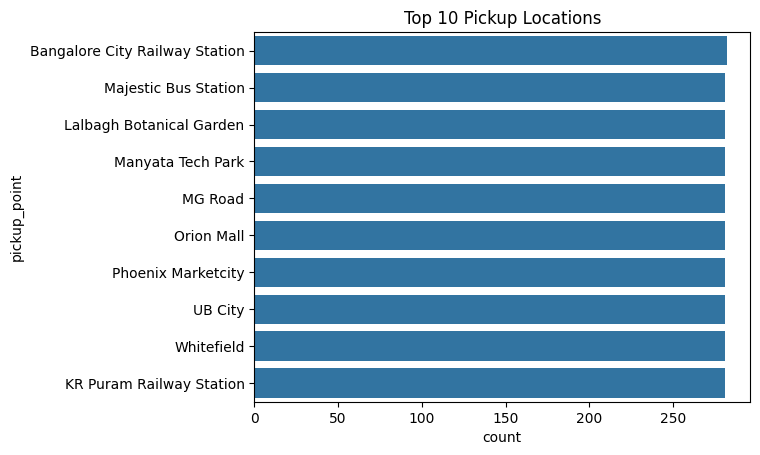

In [78]:
# Most common pickup and drop point
df['pickup_point'].value_counts().head(10)
df['drop_point'].value_counts().head(10)
sns.countplot(y=df['pickup_point'], order=df['pickup_point'].value_counts().head(10).index)
plt.title("Top 10 Pickup Locations")
plt.show()

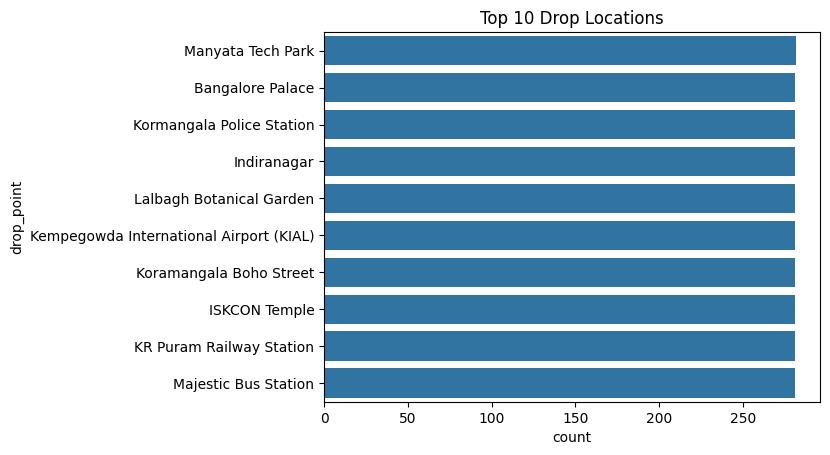

In [76]:
sns.countplot(y=df['drop_point'], order=df['drop_point'].value_counts().head(10).index)
plt.title("Top 10 Drop Locations")
plt.show()

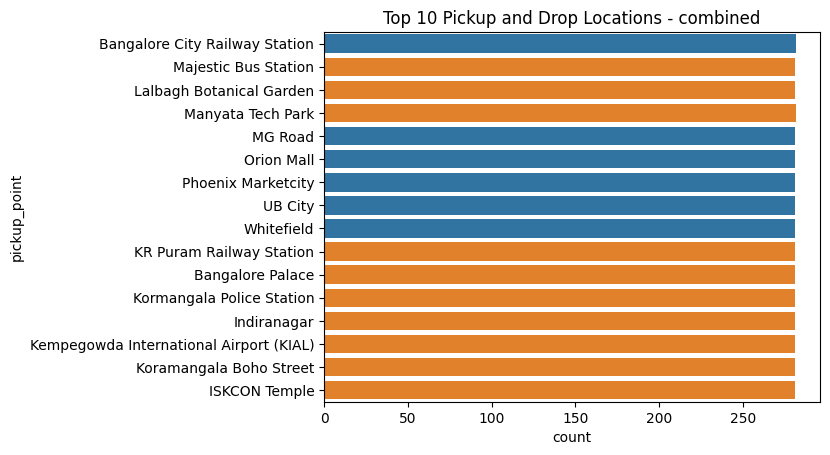

In [79]:
sns.countplot(y=df['pickup_point'], order=df['pickup_point'].value_counts().head(10).index)
sns.countplot(y=df['drop_point'], order=df['drop_point'].value_counts().head(10).index)
plt.title("Top 10 Pickup and Drop Locations - combined")
plt.show()

In [82]:
# Ride Type Insights
df.groupby('ride_type')['trip_cost'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)


,mean,count
ride_type,,
UberGo,243.455217,2285
UberXL,235.337252,2238
UberX,229.921269,2222


In [83]:
# Driver Performance Overview
driver_summary = df.groupby('driver_id').agg({
    'trip_cost': 'sum',
    'request_id': 'count',
    'extra_tip': 'sum'
}).rename(columns={'request_id': 'num_trips'})

driver_summary.sort_values(by='trip_cost', ascending=False).head(10)


,trip_cost,num_trips,extra_tip
driver_id,,,
17.0,35201.65,115,2115
26.0,32737.01,114,2245
11.0,31899.14,93,2080
42.0,31549.54,110,2085
34.0,31127.15,105,2395
9.0,29838.56,99,2330
4.0,28779.00,106,2075
35.0,28697.37,100,1830
24.0,28357.72,101,2025


In [93]:
# Weekday vs Weekend Behavior
df['is_weekend'] = df['day'].isin(['Saturday','Sunday'])
df.groupby('is_weekend')[['trip_cost','ride_delay','total_cost']].mean()


,trip_cost,ride_delay,total_cost
is_weekend,,,
False,237.204848,1.005965,253.157804
True,232.755911,0.995191,248.761763


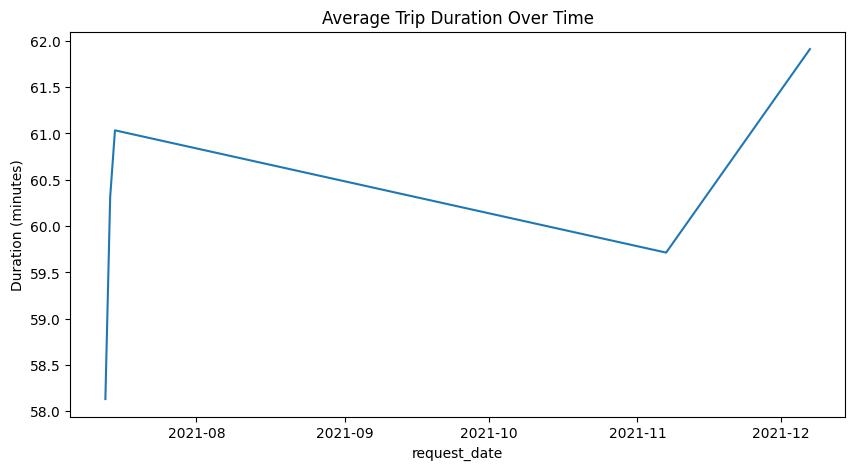

In [96]:
# Trip Duration Trend Over Time
avg_duration = df.groupby('request_date')['trip_duration_minutes'].mean()
avg_duration.plot(figsize=(10,5))
plt.title("Average Trip Duration Over Time")
plt.ylabel("Duration (minutes)")
plt.show()


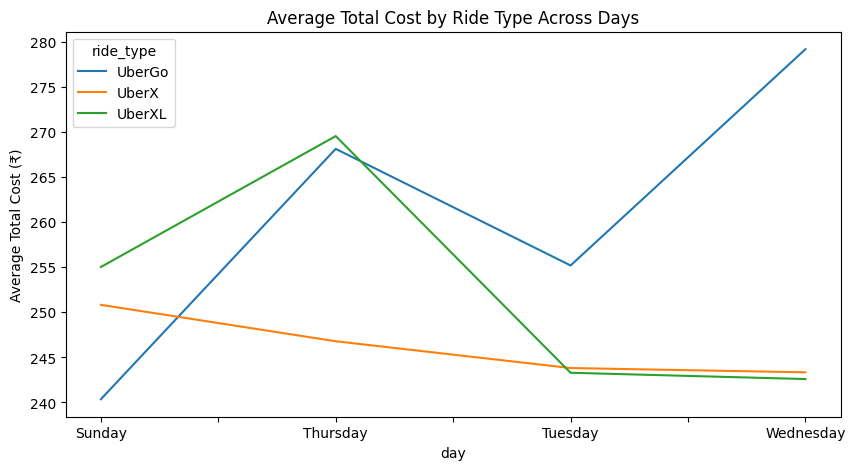

In [100]:
# Total Cost Trend by Ride Type
df.groupby(['ride_type', 'day'])['total_cost'].mean().unstack().T.plot(figsize=(10,5))
plt.title("Average Total Cost by Ride Type Across Days")
plt.ylabel("Average Total Cost (₹)")
plt.show()


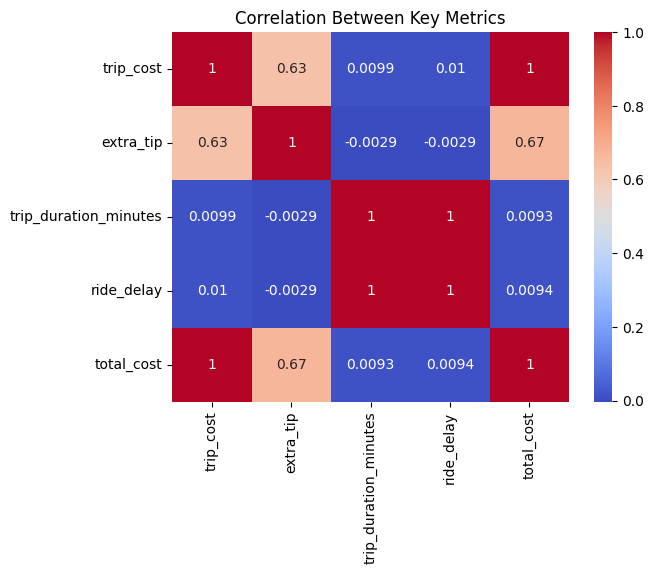

In [101]:
# Ride Delay Correlation Heatmap
corr = df[['trip_cost','extra_tip','trip_duration_minutes','ride_delay','total_cost']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Key Metrics")
plt.show()
